In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import glob
import pandas as pd
import numpy as np
from sglm.helpers import filehelpers as fh, dfhelpers as dfh
from collections import defaultdict
from pathlib import Path

In [4]:
base_keys = list({
                'gACH':(0,0),
                'rDA':(0,0),
                'gDA':(0,0),
                'photometryCenterInIndex':(0,0),
                'photometryCenterOutIndex':(0,0),
                'photometrySideInIndex':(0,0),
                'photometrySideInIndexr':(0,0),
                'photometrySideOutIndex':(0,0),
                'sl': (0,0),
                'spnnrOff': (0,0),
                'photometryCenterInIndex':(0,0),
                'photometryCenterOutIndex':(0,0),
                'photometrySideInIndexAA':(0,0),
                'photometrySideInIndexAa':(0,0),
                'photometrySideInIndexaA':(0,0),
                'photometrySideInIndexaa':(0,0),
                'photometrySideInIndexAB':(0,0),
                'photometrySideInIndexAb':(0,0),
                'photometrySideInIndexaB':(0,0),
                'photometrySideInIndexab':(0,0),
                'photometrySideOutIndex':(0,0),
                'sl': (0,0),
                'spnnrOff': (0,0),
                }.keys())
# base_keys

used_run_majors = ['base_simple', 'base_words', '_to_']


In [10]:
h5_lst = defaultdict(list)
run_id_dct = defaultdict(list)

# base_location = Path(r'/Users/josh/Documents/Harvard/GLM/sabatinilab-glm/sglm/outputs')
# base_location = Path(r'C:\Users\Josh\Documents\GitHub\sabatinilab-glm\sglm\outputs')
base_location = Path(r'/Users/Josh/Documents/GitHub/sabatinilab-glm/sglm/outputs-old')

fig_folder_lst = [#('Figure_1_2', 'f1*-ft'),
                  #('Figure_3',   'f3*-ft'),
                  #('Figure_4_g1',   'f4*-ft'),
                  #('Figure_4_g2',   'f4*-ft'),
                  #('Figure_5_g1',   'f5*-ft'),
                  #('Figure_5_g2',   'f5*-ft'),
                  #('Figure_5_g5',   'f5*-ft'),
                   ('Figure_7_g1--20_20sft',   'tet*'),
                 ]

for fig_folder in fig_folder_lst:
    print('fig_folder', fig_folder)
    
    load_folder = base_location / Path(fig_folder[0])
    # load_folder = base_location / Path(r'tmp')
    h5_beta_locations = str((load_folder / Path('all') / Path(fig_folder[1]) / Path(r'coefs\*_best_coeffs.h5')).resolve())
    
    print(h5_beta_locations)
    


#     base_location = Path(r'C:\Users\Josh\Documents\GitHub\sabatinilab-glm\sglm\outputs')

#     load_folder = base_location / Path(r'Figure_1_2')
#     h5_beta_locations = str((load_folder / Path(r'all\f1*-ft\coefs\*_best_coeffs.h5')).resolve())
#     # load_folder = base_location / Path(r'Figure_3')
#     # h5_beta_locations = str((load_folder / Path(r'all\f3*-ft\coefs\*_best_coeffs.h5')).resolve())
#     # load_folder = base_location / Path(r'Figure_4_g1')
#     # h5_beta_locations = str((load_folder / Path(r'all\f4*-ft\coefs\*_best_coeffs.h5')).resolve())
#     # load_folder = base_location / Path(r'Figure_4_g2')
#     # h5_beta_locations = str((load_folder / Path(r'all\f4*-ft\coefs\*_best_coeffs.h5')).resolve())
#     # load_folder = base_location / Path(r'Figure_5_g1')
#     # h5_beta_locations = str((load_folder / Path(r'all\f5*-ft\coefs\*_best_coeffs.h5')).resolve())
#     # load_folder = base_location / Path(r'Figure_5_g2')
#     # h5_beta_locations = str((load_folder / Path(r'all\f5*-ft\coefs\*_best_coeffs.h5')).resolve())

#     out_folder = base_location / Path(r'final_outputs')

#     # h5_beta_locations = Path('/Users/josh/Dropbox (HMS)/jz/Tetanus/1194_1195_1214_1258_1259_2_best_coeffs.h5')
#     out_loc = str((out_folder).resolve())
#     h5_beta_locations = glob.glob(h5_beta_locations)


    out_folder = base_location / Path(r'final_outputs_rev')

    out_loc = str((out_folder).resolve())
    h5_beta_locations = glob.glob(h5_beta_locations)

    fh.create_folder_if_not_exists(out_loc)
    
    h5_lst = defaultdict(list)
    for h5_coef_fn in h5_beta_locations:
        h5f = pd.HDFStore(h5_coef_fn)
        h5fk = h5f.keys()
        for key in h5fk:
            print(key)
            resp = key.split('_')[0].replace('/', '')
            model_version = '_'.join(key.split('_')[2:]).split('_run_num')[0]
            model_version = model_version.replace('5_base_words_gDA_to_gACH', '5_base_words_rDA_to_gACH')
    #         print(resp, model_version)
            h5_df = pd.read_hdf(h5f, key).reset_index()
            h5_df['fn'] = h5_coef_fn
            h5_df['key'] = key
            h5_df = h5_df.set_index(['fn','key'])


            h5_df = h5_df.sort_values('channel_name')
            h5_df['channel'] = h5_df['channel_name'].str.split('_').apply(lambda x: x[0])
            h5_df['run_num'] = h5_df['channel_name'].str.split('_').apply(lambda x: x[-1])

            h5_lst[(resp, model_version)].append(h5_df)
    #         h5_lst.append(h5_df)
    # concat = pd.concat(h5_lst, axis=0)

    fh.create_folder_if_not_exists(out_loc)



    a = None
    b = None

    h5_dfs = dict(h5_lst)
    for key in h5_dfs:
        run_major = '='.join(key)

        cont = True
        for runmajor in used_run_majors:
            if runmajor in run_major:
                cont = False
        if cont:
            continue

        val = h5_dfs[key]
        concat = pd.concat(val)

        all_kernels = []
        for base_key in base_keys:
            all_kernels += dfh.get_kernel_from_basename(base_key, list(concat.columns))


        gb_columns = ['mouse_id', 'channel', 'name']
        ak_unagg = concat.reset_index().set_index(['mouse_id', 'channel', 'name', 'run_num'])[all_kernels]

        ak_unagg.to_csv(str((Path(out_loc) / f'{load_folder.parts[-1]}-kernels_raw-{run_major}.csv').resolve()))

        kernels = ak_unagg.groupby(gb_columns).agg([np.mean, np.size, np.std])
        kernels = kernels.swaplevel(axis=1)

        ak = concat[all_kernels].copy()
        new_cols = [(dfh.shorten_col_name(_.split('_')[0]), int(_.split('_')[-1])) for _ in ak.columns]



        ak.columns = pd.MultiIndex.from_tuples(new_cols)
        ak['1'] = 1
        akgb = ak.groupby('1').agg([np.mean, np.size, np.std]).stack().sort_index().droplevel(0).copy()
        akgb.loc['sem'] = akgb.loc['std']/np.sqrt(akgb.loc['size'])
    #     akgb = akgb.loc[['mean', 'sem']]
        final_out = akgb.stack(1).unstack(0).copy()
        final_out.columns = ['_'.join(_) for _ in final_out.columns]

    #     if a is None:
    #         a = final_out
    #     else:
    #         b = final_out
    #         break

    #     print(final_out.shape)
        final_out.to_csv(str((Path(out_loc) / f'{load_folder.parts[-1]}-kernels-{run_major}.csv').resolve()))
        
#         display(final_out)

    #     break

fig_folder ('Figure_7_g1--20_20sft', 'tet*')
C:\Users\Josh\Documents\GitHub\sabatinilab-glm\sglm\outputs-old\Figure_7_g1--20_20sft\all\tet*\coefs\*_best_coeffs.h5
/gDA_ctrl_0_0_base_simple_max_iter10000__fit_interceptFalse__alpha0____0__l1_ratio0____0_run_num__0
/gDA_ctrl_0_0_base_simple_max_iter10000__fit_interceptFalse__alpha0____0__l1_ratio0____0_run_num__1
/gDA_ctrl_0_0_base_simple_max_iter10000__fit_interceptFalse__alpha0____0__l1_ratio0____0_run_num__2
/gDA_ctrl_0_0_base_simple_max_iter10000__fit_interceptFalse__alpha0____0__l1_ratio0____0_run_num__3
/gDA_ctrl_0_0_base_simple_max_iter10000__fit_interceptFalse__alpha0____0__l1_ratio0____0_run_num__4
/gDA_ctrl_0_0_base_simple_max_iter10000__fit_interceptFalse__alpha0____0__l1_ratio0____0_run_num__5
/gDA_ctrl_0_0_base_simple_max_iter10000__fit_interceptFalse__alpha0____0__l1_ratio0____0_run_num__6
/gDA_ctrl_0_0_base_simple_max_iter10000__fit_interceptFalse__alpha0____0__l1_ratio0____0_run_num__7
/gDA_ctrl_0_0_base_simple_max_iter100

C:\Users\Josh\AppData\Local\Temp\ipykernel_24728\2278525060.py:123: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  akgb = ak.groupby('1').agg([np.mean, np.size, np.std]).stack().sort_index().droplevel(0).copy()
C:\Users\Josh\AppData\Local\Temp\ipykernel_24728\2278525060.py:123: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  akgb = ak.groupby('1').agg([np.mean, np.size, np.std]).stack().sort_index().droplevel(0).copy()


In [11]:
final_out

,CI_mean,CI_sem,CI_size,CI_std,CO_mean,CO_sem,CO_size,CO_std,SIAA_mean,SIAA_sem,...,SO_size,SO_std,sl_mean,sl_sem,sl_size,sl_std,spnnrOff_mean,spnnrOff_sem,spnnrOff_size,spnnrOff_std
-20,-0.138487,0.005395,10.0,0.017059,-0.058153,0.006018,10.0,0.019032,-0.020989,0.011346,...,10.0,0.015223,-1.355043e+11,2.450019e+11,10.0,7.747642e+11,-0.189791,0.016929,10.0,0.053534
-19,-0.181002,0.004595,10.0,0.014531,-0.063753,0.006957,10.0,0.022000,0.036093,0.011641,...,10.0,0.012737,2.073793e+12,1.504604e+12,10.0,4.757975e+12,-0.149281,0.013173,10.0,0.041658
-18,-0.169597,0.006586,10.0,0.020828,-0.082576,0.006452,10.0,0.020403,0.135427,0.012890,...,10.0,0.015101,3.460231e+12,2.294498e+12,10.0,7.255839e+12,-0.139240,0.013005,10.0,0.041126
-17,-0.140002,0.006108,10.0,0.019315,-0.087293,0.006938,10.0,0.021939,0.166677,0.009324,...,10.0,0.012239,-9.237732e+11,1.565683e+12,10.0,4.951126e+12,-0.144306,0.018081,10.0,0.057177
-16,-0.134630,0.006053,10.0,0.019141,-0.068837,0.008477,10.0,0.026807,0.186218,0.010801,...,10.0,0.013049,-4.106188e+11,6.681374e+11,10.0,2.112836e+12,-0.102356,0.020223,10.0,0.063952
-15,-0.098076,0.005202,10.0,0.016451,-0.082001,0.008719,10.0,0.027572,0.224195,0.013135,...,10.0,0.012592,2.139616e+11,1.105740e+12,10.0,3.496656e+12,-0.064236,0.023252,10.0,0.073528
-14,-0.069208,0.004772,10.0,0.015090,-0.063581,0.010865,10.0,0.034358,0.275010,0.009921,...,10.0,0.015870,-6.192077e+11,8.849484e+11,10.0,2.798452e+12,-0.063947,0.021910,10.0,0.069284
-13,-0.089941,0.008200,10.0,0.025931,-0.054459,0.012118,10.0,0.038321,0.359746,0.009295,...,10.0,0.015326,-2.878788e+11,9.051986e+11,10.0,2.862489e+12,0.076413,0.023067,10.0,0.072943
-12,-0.121669,0.010697,10.0,0.033828,-0.054643,0.012310,10.0,0.038928,0.427373,0.007030,...,10.0,0.014526,-6.422495e+11,1.683624e+12,10.0,5.324087e+12,0.040038,0.029124,10.0,0.092099
-11,-0.132246,0.009857,10.0,0.031170,-0.065008,0.010703,10.0,0.033846,0.444768,0.008725,...,10.0,0.013475,4.691879e+11,1.173906e+12,10.0,3.712217e+12,-0.021031,0.019478,10.0,0.061594


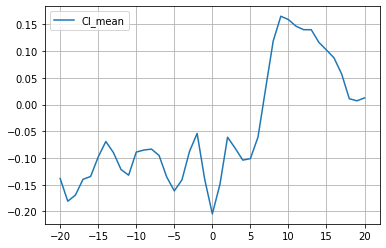

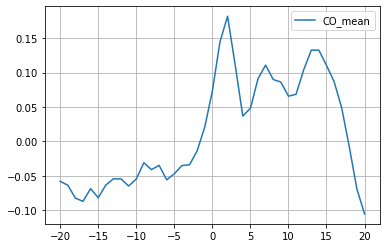

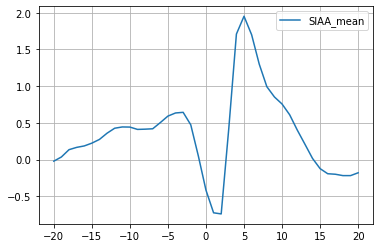

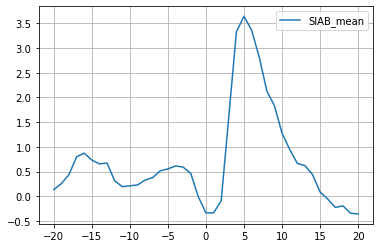

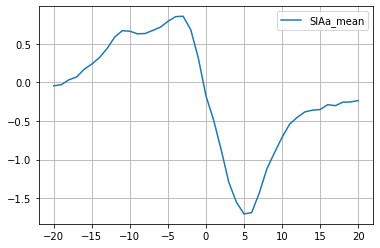

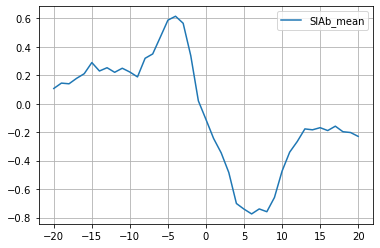

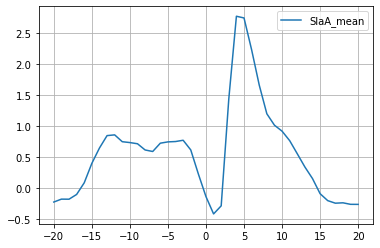

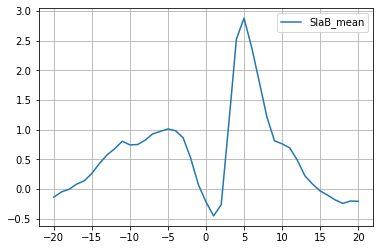

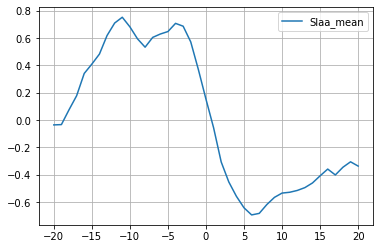

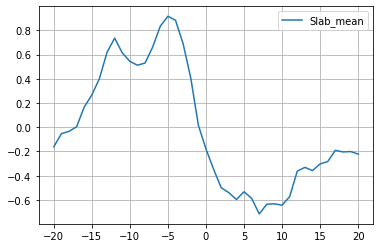

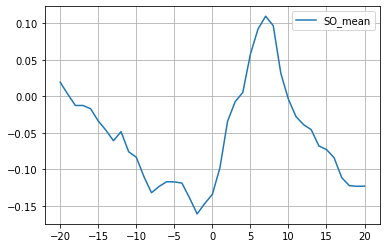

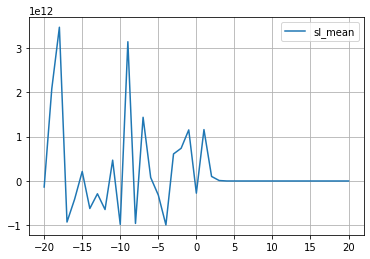

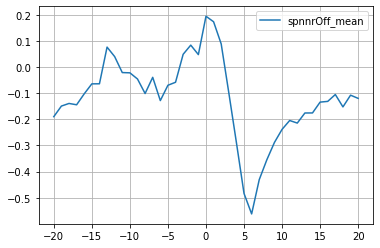

In [12]:
import matplotlib.pyplot as plt
for foc in final_out.columns:
    if 'mean' in foc:
        plt.figure()
        final_out[foc].plot(label=foc)
        plt.legend()
        plt.grid()

In [15]:
final_out.to_csv(str((Path('/Users/Josh/Desktop/tet_coef.csv')).resolve()))